In [1]:
import kwant
from matplotlib import pyplot
import math
import numpy as np
import numpy as np
from math import e as exp
import scipy


#here, we create the cubic bilayer. 
latparamsro=1
#not spin-resolved, but we can make it happen after
#no SOC either because not spin resolved, nor mzn; defo add/make own using ru, ir slater-koster
lat = kwant.lattice.Polyatomic([(latparamsro,0),(0,latparamsro)],[(0,0.1),(0,0.2),(0,0.3),(0,0.4),(0,0.5),(0,0.6),(0,0.11),(0,0.21),(0,0.31),(0,0.41),(0,0.51),(0,0.61)],norbs=1)
a,b,c,d,e,f,g,h,i,j,k,l = lat.sublattices

lam=0.1
#srtio3: let's say it has some soc, but not v strong (is it wrong to make it so low though?)
#https://journals.aps.org/prb/pdf/10.1103/PhysRevB.86.085121 says 2 meV, but it's not exactly our system; it'll do for now
mu=0.02


eps_xy_1=0.0 # "set to 0"
eps_xz_1=0.121
eps_yz_1=0.121
eps_xy_2=2.344
eps_xz_2=2.321
eps_yz_2=2.321

t_xyxy_100=-0.348
t_xyxy_010=-0.348
t_xzxz_100=-0.306
t_xzxz_010=-0.022
t_yzyz_100=-0.022
t_yzyz_010=-0.306
t_xyxy_110=-0.126
t_xzxz_110=0.015
t_yzyz_110=0.01
t_xzyz_110=0.019 

s_xyxy_100=-0.286 #
s_xyxy_010=-0.286 #
s_xzxz_100=-0.301
s_xzxz_010=-0.04 #
s_yzyz_100=-0.04 #
s_yzyz_010=-0.301
s_xyxy_110=-0.083 #
s_xzxz_110=0.002 #
s_yzyz_110=0.002 #
s_xzyz_110=0.005 #

t_xyxy_001=-0.03
t_xzxz_001=-0.314
t_yzyz_001=-0.314

s_xyxy_001=t_xyxy_001
s_xzxz_001=t_xzxz_001
s_yzyz_001=t_yzyz_001

t_xyxy_101=0.011
t_xzxz_101=-0.112
t_yzyz_101=0.011
t_xyyz_101=0

t_xyxy_011=0.011
t_xyxz_011=0.016
s_xyxz_011=0.007
t_xzxz_011=0.011
t_yzyz_011=-0.112



def make_bilayer(mzn):

    syst = kwant.Builder(kwant.TranslationalSymmetry(*lat.prim_vecs))
    bmag=0
    m=mzn
    
    
    def hopx_t_xyxy_100(site1,site2):
        y=site1.pos[1]
        return t_xyxy_100*exp**(1j*y*bmag)
    def hopx_t_xyxy_110(site1,site2):
        y=site1.pos[1]
        return t_xyxy_110*exp**(1j*y*bmag)
    def hopx_t_xzxz_100(site1,site2):
        y=site1.pos[1]
        return t_xzxz_100*exp**(1j*y*bmag)
    def hopx_t_xzxz_110(site1,site2):
        y=site1.pos[1]
        return t_xzxz_110*exp**(1j*y*bmag)
    def hopx_t_yzyz_100(site1,site2):
        y=site1.pos[1]
        return t_yzyz_100*exp**(1j*y*bmag)
    def hopx_t_yzyz_110(site1,site2):
        y=site1.pos[1]
        return t_yzyz_110*exp**(1j*y*bmag)
    def hopx_s_xyxy_100(site1,site2):
        y=site1.pos[1]
        return s_xyxy_100*exp**(1j*y*bmag)
    def hopx_s_xyxy_110(site1,site2):
        y=site1.pos[1]
        return s_xyxy_110*exp**(1j*y*bmag)
    def hopx_s_xzxz_100(site1,site2):
        y=site1.pos[1]
        return s_xzxz_100*exp**(1j*y*bmag)
    def hopx_s_xzxz_110(site1,site2):
        y=site1.pos[1]
        return s_xzxz_110*exp**(1j*y*bmag)
    def hopx_s_yzyz_100(site1,site2):
        y=site1.pos[1]
        return s_yzyz_100*exp**(1j*y*bmag)
    def hopx_s_yzyz_110(site1,site2):
        y=site1.pos[1]
        return s_yzyz_110*exp**(1j*y*bmag)

    def hopx_t_xyxy_101(site1,site2):
        y=site1.pos[1]
        return t_xyxy_101*exp**(1j*y*bmag)
    def hopx_t_xzxz_101(site1,site2):
        y=site1.pos[1]
        return t_xzxz_101*exp**(1j*y*bmag)
    def hopx_t_yzyz_101(site1,site2):
        y=site1.pos[1]
        return t_yzyz_101*exp**(1j*y*bmag)

    def hopx_t_xzyz_110(site1,site2):
        y=site1.pos[1]
        return t_xzyz_110*exp**(1j*y*bmag)
    def hopx_m_t_xzyz_110(site1,site2):
        y=site1.pos[1]
        return -t_xzyz_110*exp**(1j*y*bmag)
    def hopx_s_xzyz_110(site1,site2):
        y=site1.pos[1]
        return s_xzyz_110*exp**(1j*y*bmag)
    def hopx_m_s_xzyz_110(site1,site2):
        y=site1.pos[1]
        return -s_xzyz_110*exp**(1j*y*bmag)
    
    syst[a.shape(lambda pos: True, (0.01, 0))]=eps_xy_1+m
    syst[b.shape(lambda pos: True, (0.011, 0))]=eps_xz_1+m
    syst[c.shape(lambda pos: True, (0.012, 0))]=eps_yz_1+m
    syst[d.shape(lambda pos: True, (0.013, 0))]=eps_xy_1-m
    syst[e.shape(lambda pos: True, (0.014, 0))]=eps_xz_1-m
    syst[f.shape(lambda pos: True, (0.015, 0))]=eps_yz_1-m
    
    syst[g.shape(lambda pos: True, (0.016, 0))]=eps_xy_2#+m/100
    syst[h.shape(lambda pos: True, (0.017, 0))]=eps_xz_2#+m/100
    syst[i.shape(lambda pos: True, (0.018, 0))]=eps_yz_2#+m/100
    syst[j.shape(lambda pos: True, (0.019, 0))]=eps_xy_2#-m/100
    syst[k.shape(lambda pos: True, (0.020, 0))]=eps_xz_2#-m/100
    syst[l.shape(lambda pos: True, (0.021, 0))]=eps_yz_2#-m/100
    
      
    #Wojtek Ru
    syst[kwant.builder.HoppingKind((0, 0),a,e)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),a,f)]=-lam
    syst[kwant.builder.HoppingKind((0, 0),b,c)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),b,d)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),c,b)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),c,d)]=lam
    syst[kwant.builder.HoppingKind((0, 0),d,b)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),d,c)]=lam
    syst[kwant.builder.HoppingKind((0, 0),e,a)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),e,f)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),f,a)]=-lam
    syst[kwant.builder.HoppingKind((0, 0),f,e)]=1j*lam
    
    #Wojtek Ir
    syst[kwant.builder.HoppingKind((0, 0),g,k)]=1j*mu
    syst[kwant.builder.HoppingKind((0, 0),g,l)]=-mu
    syst[kwant.builder.HoppingKind((0, 0),h,i)]=1j*mu
    syst[kwant.builder.HoppingKind((0, 0),h,j)]=-1j*mu
    syst[kwant.builder.HoppingKind((0, 0),i,h)]=-1j*mu
    syst[kwant.builder.HoppingKind((0, 0),i,j)]=mu
    syst[kwant.builder.HoppingKind((0, 0),j,h)]=1j*mu
    syst[kwant.builder.HoppingKind((0, 0),j,i)]=mu
    syst[kwant.builder.HoppingKind((0, 0),k,g)]=-1j*mu
    syst[kwant.builder.HoppingKind((0, 0),k,l)]=-1j*mu
    syst[kwant.builder.HoppingKind((0, 0),l,g)]=-mu
    syst[kwant.builder.HoppingKind((0, 0),l,k)]=1j*mu

    
    
    syst[kwant.builder.HoppingKind((1, 0),a,a)]=hopx_t_xyxy_100
    syst[kwant.builder.HoppingKind((1, 0),b,b)]=hopx_t_xzxz_100
    syst[kwant.builder.HoppingKind((1, 0),c,c)]=hopx_t_yzyz_100
    syst[kwant.builder.HoppingKind((1, 0),d,d)]=hopx_t_xyxy_100
    syst[kwant.builder.HoppingKind((1, 0),e,e)]=hopx_t_xzxz_100
    syst[kwant.builder.HoppingKind((1, 0),f,f)]=hopx_t_yzyz_100
    

    syst[kwant.builder.HoppingKind((1, 0),g,g)]=hopx_s_xyxy_100
    syst[kwant.builder.HoppingKind((1, 0),h,h)]=hopx_s_xzxz_100
    syst[kwant.builder.HoppingKind((1, 0),i,i)]=hopx_s_yzyz_100
    syst[kwant.builder.HoppingKind((1, 0),j,j)]=hopx_s_xyxy_100
    syst[kwant.builder.HoppingKind((1, 0),k,k)]=hopx_s_xzxz_100
    syst[kwant.builder.HoppingKind((1, 0),l,l)]=hopx_s_yzyz_100
    
    syst[kwant.builder.HoppingKind((0, 1),a,a)]=t_xyxy_010
    syst[kwant.builder.HoppingKind((0, 1),b,b)]=t_xzxz_010
    syst[kwant.builder.HoppingKind((0, 1),c,c)]=t_yzyz_010
    syst[kwant.builder.HoppingKind((0, 1),d,d)]=t_xyxy_010
    syst[kwant.builder.HoppingKind((0, 1),e,e)]=t_xzxz_010
    syst[kwant.builder.HoppingKind((0, 1),f,f)]=t_yzyz_010
    
    syst[kwant.builder.HoppingKind((0, 1),g,g)]=s_xyxy_010
    syst[kwant.builder.HoppingKind((0, 1),h,h)]=s_xzxz_010
    syst[kwant.builder.HoppingKind((0, 1),i,i)]=s_yzyz_010
    syst[kwant.builder.HoppingKind((0, 1),j,j)]=s_xyxy_010
    syst[kwant.builder.HoppingKind((0, 1),k,k)]=s_xzxz_010
    syst[kwant.builder.HoppingKind((0, 1),l,l)]=s_yzyz_010
    
    syst[kwant.builder.HoppingKind((1, 1),a,a)]=hopx_t_xyxy_110
    syst[kwant.builder.HoppingKind((1, 1),b,b)]=hopx_t_xzxz_110
    syst[kwant.builder.HoppingKind((1, 1),c,c)]=hopx_t_yzyz_110
    syst[kwant.builder.HoppingKind((1, 1),b,c)]=hopx_t_xzyz_110
    syst[kwant.builder.HoppingKind((1, 1),c,b)]=hopx_t_xzyz_110
    syst[kwant.builder.HoppingKind((1, 1),d,d)]=hopx_t_xyxy_110
    syst[kwant.builder.HoppingKind((1, 1),e,e)]=hopx_t_xzxz_110
    syst[kwant.builder.HoppingKind((1, 1),f,f)]=hopx_t_yzyz_110
    syst[kwant.builder.HoppingKind((1, 1),f,e)]=hopx_t_xzyz_110
    syst[kwant.builder.HoppingKind((1, 1),e,f)]=hopx_t_xzyz_110
    
    syst[kwant.builder.HoppingKind((1, 1),g,g)]=hopx_s_xyxy_110
    syst[kwant.builder.HoppingKind((1, 1),h,h)]=hopx_s_xzxz_110
    syst[kwant.builder.HoppingKind((1, 1),i,i)]=hopx_s_yzyz_110
    syst[kwant.builder.HoppingKind((1, 1),h,i)]=hopx_s_xzyz_110
    syst[kwant.builder.HoppingKind((1, 1),i,h)]=hopx_s_xzyz_110
    syst[kwant.builder.HoppingKind((1, 1),j,j)]=hopx_s_xyxy_110
    syst[kwant.builder.HoppingKind((1, 1),k,k)]=hopx_s_xzxz_110
    syst[kwant.builder.HoppingKind((1, 1),l,l)]=hopx_s_yzyz_110
    syst[kwant.builder.HoppingKind((1, 1),l,k)]=hopx_s_xzyz_110
    syst[kwant.builder.HoppingKind((1, 1),k,l)]=hopx_s_xzyz_110
    
    syst[kwant.builder.HoppingKind((-1, -1),a,a)]=hopx_t_xyxy_110
    syst[kwant.builder.HoppingKind((-1, -1),b,b)]=hopx_t_xzxz_110
    syst[kwant.builder.HoppingKind((-1, -1),c,c)]=hopx_t_yzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),b,c)]=hopx_t_xzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),c,b)]=hopx_t_xzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),d,d)]=hopx_t_xyxy_110
    syst[kwant.builder.HoppingKind((-1, -1),e,e)]=hopx_t_xzxz_110
    syst[kwant.builder.HoppingKind((-1, -1),f,f)]=hopx_t_yzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),f,e)]=hopx_t_xzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),e,f)]=hopx_t_xzyz_110
    
    syst[kwant.builder.HoppingKind((-1, -1),g,g)]=hopx_s_xyxy_110
    syst[kwant.builder.HoppingKind((-1, -1),h,h)]=hopx_s_xzxz_110
    syst[kwant.builder.HoppingKind((-1, -1),i,i)]=hopx_s_yzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),h,i)]=hopx_s_xzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),i,h)]=hopx_s_xzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),j,j)]=hopx_s_xyxy_110
    syst[kwant.builder.HoppingKind((-1, -1),k,k)]=hopx_s_xzxz_110
    syst[kwant.builder.HoppingKind((-1, -1),l,l)]=hopx_s_yzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),l,k)]=hopx_s_xzyz_110
    syst[kwant.builder.HoppingKind((-1, -1),k,l)]=hopx_s_xzyz_110
    
    syst[kwant.builder.HoppingKind((1, -1),a,a)]=hopx_t_xyxy_110
    syst[kwant.builder.HoppingKind((1, -1),b,b)]=hopx_t_xzxz_110
    syst[kwant.builder.HoppingKind((1, -1),c,c)]=hopx_t_yzyz_110
    syst[kwant.builder.HoppingKind((1, -1),b,c)]=hopx_m_t_xzyz_110
    syst[kwant.builder.HoppingKind((1, -1),c,b)]=hopx_m_t_xzyz_110
    syst[kwant.builder.HoppingKind((1, -1),d,d)]=hopx_t_xyxy_110
    syst[kwant.builder.HoppingKind((1, -1),e,e)]=hopx_t_xzxz_110
    syst[kwant.builder.HoppingKind((1, -1),f,f)]=hopx_t_yzyz_110
    syst[kwant.builder.HoppingKind((1, -1),f,e)]=hopx_m_t_xzyz_110
    syst[kwant.builder.HoppingKind((1, -1),e,f)]=hopx_m_t_xzyz_110
    
    syst[kwant.builder.HoppingKind((1, -1),g,g)]=hopx_s_xyxy_110
    syst[kwant.builder.HoppingKind((1, -1),h,h)]=hopx_s_xzxz_110
    syst[kwant.builder.HoppingKind((1, -1),i,i)]=hopx_s_yzyz_110
    syst[kwant.builder.HoppingKind((1, -1),h,i)]=hopx_m_s_xzyz_110
    syst[kwant.builder.HoppingKind((1, -1),i,h)]=hopx_m_s_xzyz_110
    syst[kwant.builder.HoppingKind((1, -1),j,j)]=hopx_s_xyxy_110
    syst[kwant.builder.HoppingKind((1, -1),k,k)]=hopx_s_xzxz_110
    syst[kwant.builder.HoppingKind((1, -1),l,l)]=hopx_s_yzyz_110
    syst[kwant.builder.HoppingKind((1, -1),l,k)]=hopx_m_s_xzyz_110
    syst[kwant.builder.HoppingKind((1, -1),k,l)]=hopx_m_s_xzyz_110
    
    syst[kwant.builder.HoppingKind((-1, 1),a,a)]=hopx_t_xyxy_110
    syst[kwant.builder.HoppingKind((-1, 1),b,b)]=hopx_t_xzxz_110
    syst[kwant.builder.HoppingKind((-1, 1),c,c)]=hopx_t_yzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),b,c)]=hopx_m_t_xzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),c,b)]=hopx_m_t_xzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),d,d)]=hopx_t_xyxy_110
    syst[kwant.builder.HoppingKind((-1, 1),e,e)]=hopx_t_xzxz_110
    syst[kwant.builder.HoppingKind((-1, 1),f,f)]=hopx_t_yzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),f,e)]=hopx_m_t_xzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),e,f)]=hopx_m_t_xzyz_110
    
    syst[kwant.builder.HoppingKind((-1, 1),g,g)]=hopx_s_xyxy_110
    syst[kwant.builder.HoppingKind((-1, 1),h,h)]=hopx_s_xzxz_110
    syst[kwant.builder.HoppingKind((-1, 1),i,i)]=hopx_s_yzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),h,i)]=hopx_m_s_xzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),i,h)]=hopx_m_s_xzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),j,j)]=hopx_s_xyxy_110
    syst[kwant.builder.HoppingKind((-1, 1),k,k)]=hopx_s_xzxz_110
    syst[kwant.builder.HoppingKind((-1, 1),l,l)]=hopx_s_yzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),l,k)]=hopx_m_s_xzyz_110
    syst[kwant.builder.HoppingKind((-1, 1),k,l)]=hopx_m_s_xzyz_110
    
    #adding rashba w best educated guess for hoppinz ('order of a few meV')
    #we also only care about twisting within sro, so only add for sro
#     #NN
#     syst[kwant.builder.HoppingKind((0, 1),b,a)]=5
#     syst[kwant.builder.HoppingKind((0, -1),b,a)]=-5
#     syst[kwant.builder.HoppingKind((1, 0),c,a)]=5
#     syst[kwant.builder.HoppingKind((1, 0),c,a)]=-5
#     syst[kwant.builder.HoppingKind((0, 1),a,b)]=-5
#     syst[kwant.builder.HoppingKind((0, -1),a,b)]=5
#     syst[kwant.builder.HoppingKind((1, 0),a,c)]=5
#     syst[kwant.builder.HoppingKind((-1, 0),a,c)]=-5
    
#     syst[kwant.builder.HoppingKind((0, 1),e,d)]=5
#     syst[kwant.builder.HoppingKind((0, -1),e,d)]=-5
#     syst[kwant.builder.HoppingKind((1, 0),f,d)]=5
#     syst[kwant.builder.HoppingKind((1, 0),f,d)]=-5
#     syst[kwant.builder.HoppingKind((0, 1),d,e)]=-5
#     syst[kwant.builder.HoppingKind((0, -1),d,e)]=5
#     syst[kwant.builder.HoppingKind((1, 0),d,f)]=-5
#     syst[kwant.builder.HoppingKind((-1, 0),d,f)]=5
#     #NNN
#     syst[kwant.builder.HoppingKind((1, 1),b,a)]=3
#     syst[kwant.builder.HoppingKind((1, -1),b,a)]=-3
#     syst[kwant.builder.HoppingKind((1, 1),c,a)]=3
#     syst[kwant.builder.HoppingKind((-1, 1),c,a)]=-3
#     syst[kwant.builder.HoppingKind((1, 1),a,b)]=-3
#     syst[kwant.builder.HoppingKind((1, -1),a,b)]=3
#     syst[kwant.builder.HoppingKind((1, 1),a,c)]=-3
#     syst[kwant.builder.HoppingKind((-1, 1),a,c)]=3
    

    #hopping between sublattices
    syst[kwant.builder.HoppingKind((0, 0),a,g)]=t_xyxy_001
    syst[kwant.builder.HoppingKind((0, 0),b,h)]=t_xzxz_001
    syst[kwant.builder.HoppingKind((0, 0),c,i)]=t_yzyz_001
    syst[kwant.builder.HoppingKind((0, 0),g,a)]=t_xyxy_001
    syst[kwant.builder.HoppingKind((0, 0),h,b)]=t_xzxz_001
    syst[kwant.builder.HoppingKind((0, 0),i,c)]=t_yzyz_001
    
    syst[kwant.builder.HoppingKind((0, 0),d,j)]=t_xyxy_001
    syst[kwant.builder.HoppingKind((0, 0),e,k)]=t_xzxz_001
    syst[kwant.builder.HoppingKind((0, 0),f,l)]=t_yzyz_001
    syst[kwant.builder.HoppingKind((0, 0),j,d)]=t_xyxy_001
    syst[kwant.builder.HoppingKind((0, 0),k,e)]=t_xzxz_001
    syst[kwant.builder.HoppingKind((0, 0),l,f)]=t_yzyz_001
        
    #101
    #ir-->ru diag
    syst[kwant.builder.HoppingKind((1, 0),a,g)]=hopx_t_xyxy_101
    syst[kwant.builder.HoppingKind((1, 0),b,h)]=hopx_t_xzxz_101
    syst[kwant.builder.HoppingKind((1, 0),c,i)]=hopx_t_yzyz_101
    syst[kwant.builder.HoppingKind((1, 0),d,j)]=hopx_t_xyxy_101
    syst[kwant.builder.HoppingKind((1, 0),e,k)]=hopx_t_xzxz_101
    syst[kwant.builder.HoppingKind((1, 0),f,l)]=hopx_t_yzyz_101
    #ru-->ir diag
    syst[kwant.builder.HoppingKind((1, 0),g,a)]=hopx_t_xyxy_101
    syst[kwant.builder.HoppingKind((1, 0),h,b)]=hopx_t_xzxz_101
    syst[kwant.builder.HoppingKind((1, 0),i,c)]=hopx_t_yzyz_101
    syst[kwant.builder.HoppingKind((1, 0),j,d)]=hopx_t_xyxy_101
    syst[kwant.builder.HoppingKind((1, 0),k,e)]=hopx_t_xzxz_101
    syst[kwant.builder.HoppingKind((1, 0),l,f)]=hopx_t_yzyz_101
    #ir-->ru off-diag
    s_xyyz_101=0 #lol
    #ru-->ir off-diag
    #d!tt0
    
    #011
    #ir-->ru diag
    syst[kwant.builder.HoppingKind((0, 1),a,g)]=t_xyxy_011
    syst[kwant.builder.HoppingKind((0, 1),b,h)]=t_xzxz_011
    syst[kwant.builder.HoppingKind((0, 1),c,i)]=t_yzyz_011
    syst[kwant.builder.HoppingKind((0, 1),d,j)]=t_xyxy_011
    syst[kwant.builder.HoppingKind((0, 1),e,k)]=t_xzxz_011
    syst[kwant.builder.HoppingKind((0, 1),f,l)]=t_yzyz_011
    #ru-->ir diag
    syst[kwant.builder.HoppingKind((0, 1),g,a)]=t_xyxy_011
    syst[kwant.builder.HoppingKind((0, 1),h,b)]=t_xzxz_011
    syst[kwant.builder.HoppingKind((0, 1),i,c)]=t_yzyz_011
    syst[kwant.builder.HoppingKind((0, 1),j,d)]=t_xyxy_011
    syst[kwant.builder.HoppingKind((0, 1),k,e)]=t_xzxz_011
    syst[kwant.builder.HoppingKind((0, 1),l,f)]=t_yzyz_011
    
    #ir-->ru off-diag
    syst[kwant.builder.HoppingKind((0, 1),a,h)]=t_xyxz_011 
    syst[kwant.builder.HoppingKind((0, 1),b,g)]=s_xyxz_011 
    syst[kwant.builder.HoppingKind((0, -1),a,h)]=-s_xyxz_011
    syst[kwant.builder.HoppingKind((0, -1),b,g)]=-s_xyxz_011
    syst[kwant.builder.HoppingKind((0, 1),d,k)]=t_xyxz_011
    syst[kwant.builder.HoppingKind((0, 1),e,j)]=s_xyxz_011
    syst[kwant.builder.HoppingKind((0, -1),d,k)]=-t_xyxz_011
    syst[kwant.builder.HoppingKind((0, -1),e,j)]=-s_xyxz_011
    
    #ru-->ir off-diag #H21 is hermitian conjugate of H12: signs change before FT
    syst[kwant.builder.HoppingKind((0, 1),h,a)]=-t_xyxz_011
    syst[kwant.builder.HoppingKind((0, 1),g,b)]=-s_xyxz_011
    syst[kwant.builder.HoppingKind((0, -1),h,a)]=t_xyxz_011
    syst[kwant.builder.HoppingKind((0, -1),g,b)]=s_xyxz_011
    syst[kwant.builder.HoppingKind((0, 1),k,d)]=-t_xyxz_011
    syst[kwant.builder.HoppingKind((0, 1),j,e)]=-s_xyxz_011
    syst[kwant.builder.HoppingKind((0, -1),k,d)]=t_xyxz_011    
    syst[kwant.builder.HoppingKind((0, -1),j,e)]=s_xyxz_011
    
    return syst

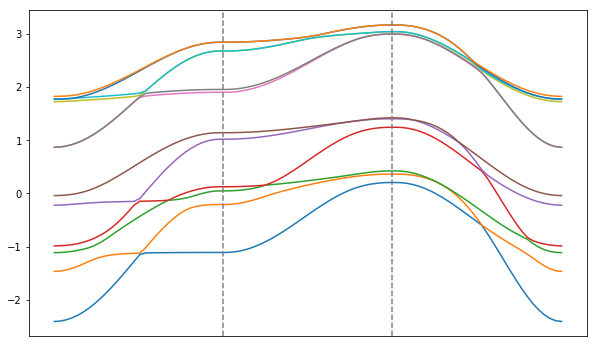

In [3]:
import matplotlib.pyplot as plt
import scipy
def hs_2d(sys,pr,ch):
    syst=kwant.wraparound.wraparound(sys,keep=None).finalized()    
    lat_ndim, space_ndim = syst._wrapped_symmetry.periods.shape #checks shape
    if lat_ndim != 2:
        raise ValueError("Expected a system with a 2D translational symmetry.")
    if space_ndim != lat_ndim:
        raise ValueError("Lattice dimension must equal realspace dimension.")
        
    B = np.array(syst._wrapped_symmetry.periods).T #lattice vectors
    A = B.dot(np.linalg.inv(B.T.dot(B)))#reciprocal lattice vectors
        
    z=[0]
    p=[np.pi]
    mp=[-np.pi]
    ztopi=np.linspace(0,np.pi,pr)
    ztompi=np.linspace(0,-np.pi,pr)
    pitoz=np.linspace(np.pi,0,pr)
    mpitoz=np.linspace(-np.pi,0,pr)
    
    #the path is gamma-->x-->M-->gamma
    #define gamma-->x, x-->M, M-->gamma
    def energy(kx, ky,b_n):
        k = np.array([kx, ky])
        kx, ky = np.linalg.solve(A, k)
        H = syst.hamiltonian_submatrix([kx, ky], sparse=False)
        m=scipy.linalg.eigh(H)[0]
        return m[b_n]
    def energies(pathx,pathy,band_number):
        es=np.array([[[energy(kx, ky,band_number) for kx in pathx] for ky in pathy]])
        return es
    def per_band(band):
        gtx=energies(ztopi,z,band)[0][0]
        xtom=energies(p,ztompi,band)[0]
        #mtog requires more finesse. we need to pick out the 30 points where for kx[i],ky[j], i==j.
        mtog_t=energies(pitoz,mpitoz,band)[0]
        egs=[]
        for i in range(len(pitoz)):
            b=mtog_t[i][i]
            egs.append(b)
        mtog=egs
        path=[]
        for i in gtx:
            path.append(i)
        for j in xtom:
            jj=j[0]
            path.append(jj)
        for l in mtog:
            path.append(l) 
        return path
    xaxis=np.linspace(0,3*pr,3*pr)
    fig, ax = plt.subplots(figsize=(10,6))
    plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax.plot(xaxis,per_band(0))
    ax.plot(xaxis,per_band(1))
    ax.plot(xaxis,per_band(2))
    ax.plot(xaxis,per_band(3))
    ax.plot(xaxis,per_band(4))
    ax.plot(xaxis,per_band(5))
    ax.plot(xaxis,per_band(6))
    ax.plot(xaxis,per_band(7))
    ax.plot(xaxis,per_band(8))
    ax.plot(xaxis,per_band(9))
    ax.plot(xaxis,per_band(10))
    ax.plot(xaxis,per_band(11))
    plt.axvline(x=pr,linestyle='--',color='gray')    
    plt.axvline(x=2*pr,linestyle='--',color='gray')
    #plt.axhline(y=0,linestyle='--',color='gray')
    #plt.ylabel('Energy [ eV ]')
    plt.show()


hs_2d(make_bilayer(0.5),30,1)

In [35]:
#generate the matrices!
def gen_EVS_permzn(mzn,ksp):
    '''
    We want a matrix where each entry is associated to a point in 2d k-space. Each point has a vector of EV and ES in orbital basis.
    '''
    sys=make_bilayer(mzn=mzn)
    B = np.array(sys.symmetry.periods).T
    A = B @ np.linalg.inv(B.T @ B)
    syst=kwant.wraparound.wraparound(sys).finalized()
    
    def energy_norm(kx, ky):
        k = np.array([kx, ky])
        kx, ky = np.linalg.solve(A, k)
        H = syst.hamiltonian_submatrix([kx, ky], sparse=False)
        m=scipy.linalg.eigh(H)
        return m 
    
    def k_mats(prec):
        long_ks=np.linspace(-np.pi, np.pi, prec,endpoint=False) #endpoint=False requires putting ar,ad back in.
        dupl=[1 for i in range(prec)]
        ky_ks=np.kron(long_ks,dupl)
        kx_ks=np.kron(dupl,long_ks)
        k2=prec*prec
        return ky_ks,kx_ks,k2
    
    ky_ks,kx_ks,k2=k_mats(ksp)
    evs=[energy_norm(kx_ks[u], ky_ks[u]) for u in range(k2)] #bigcalc
    
    ev=[evs[i][0] for i in range(k2)]
    es=[evs[i][1] for i in range(k2)]
    
    return ev,es

def gen_EVS(mznprec,ksp):
    '''
    Here we generate the supermatrices of the EV and ES (array of matrices) for several magnetization values. mznprec 
    determines the length of this array.
    '''
    if mznprec%2!=0:
        mazn=[0.5]#np.linspace(-2,0,mznprec)
    else:
        mazn=[0.5]#np.linspace(-2,0,mznprec+1) #the +1 is to account for the 0 in the middle
    supermatrix=[gen_EVS_permzn(m,ksp=ksp) for m in mazn] #bigcalc
    ev_supermatrix=[supermatrix[i][0] for i in range(len(mazn))]
    es_supermatrix=[supermatrix[i][1] for i in range(len(mazn))]
    return ev_supermatrix,es_supermatrix

In [5]:
import scipy
def fermi_surface_atm_pb(evsmat,mzn,b_n,level=0):
    
    ev,es=evsmat

    ev=ev[mzn]#all k-points, w all bands
    prec=int(np.sqrt(len(ev)))
    k2=len(ev) 
    ev=[ev[i][b_n] for i in range(k2)]
    ev=np.array(ev)    
        
    def squares(v1,v2,v3,v4):
        sumev=ev[v1]+ev[v2]+ev[v3]+ev[v4]
        [new]=np.where(sumev<level)
        return v1[new]
    
    newnl=squares(nl,nl_x,nl_y,nl_xy)
    newar=squares(ar,ar_x,ar_y,ar_xy)
    newad=squares(ad,ad_x,ad_y,ad_xy)
    
    t_v=es[mzn]#all k-points, w all bands
    t_v=[t_v[i][:,b_n:b_n+1] for i in range(k2)]
    t_v=np.array(t_v)
    
    def b_c(ind,indx,indy,indxy):
        fa_1=np.sum(t_v[ind].conj()*t_v[indx],1)# k and k+kx
        fa_2=np.sum(t_v[indx].conj()*t_v[indxy],1) #k+kx and k+kx+ky
        fa_3=np.sum(t_v[indxy].conj()*t_v[indy],1) #k+kx+ky and k+ky
        fa_4=np.sum(t_v[indy].conj()*t_v[ind],1) #k+ky and k
        fa=fa_1*fa_2*fa_3*fa_4
        pn=np.angle(fa)
        pn=np.mod(pn+np.pi/2,np.pi)-np.pi/2
        pn=np.transpose(pn)[0]
        return pn
        
    pn_nl=b_c(newnl,newnl+1,newnl+prec,newnl+prec+1)
    pn_ar=b_c(newar,newar-prec+1,newar+prec,newar+1)
    pn_ad=b_c(newad,newad+1,newad-prec*(prec-1),newad-prec*(prec-1)+1)
    last=b_c([k2-1],[ad[0]],[ar[0]],[nl[0]])[0]
        
    #shape into a mat so that it can be used for visual representations
    vect=np.zeros(k2)
    vect[newnl]=pn_nl
    vect[newar]=pn_ar
    vect[newad]=pn_ad
    vect[-1]=last
    mat=np.reshape(vect,(prec,prec))
    return mat,sum(vect)

In [6]:
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [96]:
evsmat=gen_EVS(1,400)

In [25]:
len(evsmat[0])

21

In [97]:
def gen_spaces():
    ks=int(np.sqrt(len(evsmat[0][0])))#recuperate ksp
    sgs=range(ks)
    limit_right=[pp*ks-1 for pp in sgs]#keep the last point out
    limit_down=[ks*(ks)+i for i in [-ks+j for j in range(ks-1)]]
    anls_right=np.array([iks for iks in range(ks*ks) if iks in limit_right])
    anls_down=np.array([iks for iks in range(ks*ks) if iks in limit_down])
    new_linspace=np.array([iks for iks in range(ks*ks) if iks not in limit_right and iks not in limit_down and iks != (ks*ks-1)])
    nl_x=new_linspace+1
    nl_y=new_linspace+ks
    nl_xy=new_linspace+ks+1
    ad_y=anls_down-ks*(ks-1)
    ad_xy=anls_down-ks*(ks-1)+1
    ad_x=anls_down+1
    ar_y=anls_right+ks
    ar_x=anls_right-ks+1
    ar_xy=anls_right+1
    return anls_right,anls_down,new_linspace,nl_x,nl_y,nl_xy,ad_x,ad_y,ad_xy,ar_x,ar_y,ar_xy
ar,ad,nl,nl_x,nl_y,nl_xy,ad_x,ad_y,ad_xy,ar_x,ar_y,ar_xy=gen_spaces()

In [32]:
def get_cdy(mzn,lev):
    cy=[]
    for ban in range(len(evsmat[0][0][0])):
        condy=fermi_surface_atm_pb(evsmat,mzn,ban,lev)[1]
        cy.append(condy)
    return 1/(2*np.pi)*sum(cy)

In [38]:
def gen_data():
    return [get_cdy(i,0) for i in range(len(evsmat[0]))]
bx=gen_data()

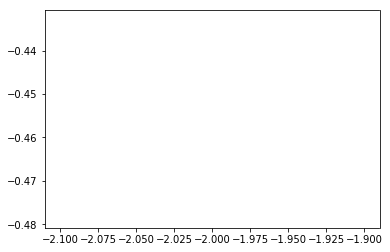

In [98]:
import matplotlib.pyplot as plt
xaxis=np.linspace(-2,2,len(bx))

def plot_cdy(b):
    fig, ax = plt.subplots()
    size=10
    ax.plot(xaxis,b)
    plt.show()
plot_cdy(bx)

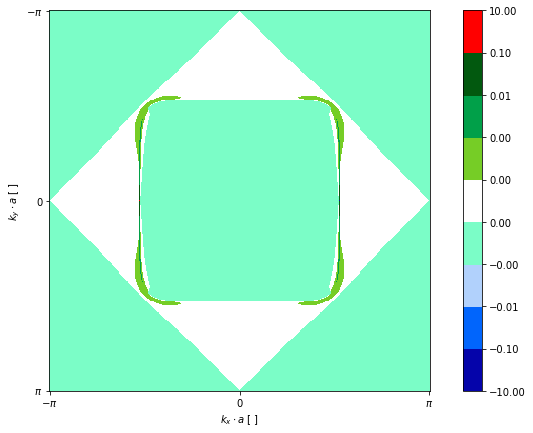

In [154]:
import matplotlib
def plot_that():
    levels = [-10,-0.1,-0.01,-0.001,0,0.00001,0.001,0.01,0.1,10]
    colors = ['#0504aa','#0165fc','#b1d1fc','#7bfdc7','white','#76cd26','#01a049','#02590f','red']
    cm, nm = matplotlib.colors.from_levels_and_colors(levels, colors)
    fig,ax=plt.subplots(figsize=(12,7))
    im=plt.imshow(fermi_surface_atm_pb(evsmat,0,0,1000)[0],cmap=cm, norm=nm, interpolation='nearest')
    fig.colorbar(im, ax=ax)
    ax.xaxis.set_ticks([0,200,399])
    ax.xaxis.set_ticklabels(['$-\pi$','0','$\pi$'])
    ax.yaxis.set_ticks([0,200,399])
    ax.yaxis.set_ticklabels(['$-\pi$','0','$\pi$'])
    plt.xlabel('$k_x\cdot a \ [ \ ]$')
    plt.ylabel('$k_y\cdot a \ [ \ ]$')
    plt.savefig('ti0.5_0.eps', format='eps',bbox_inches='tight')
    plt.show()
plot_that()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
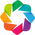

In [40]:
import holoviews as hv
hv.extension('matplotlib','bokeh')

:Surface   [x,y]   (z)
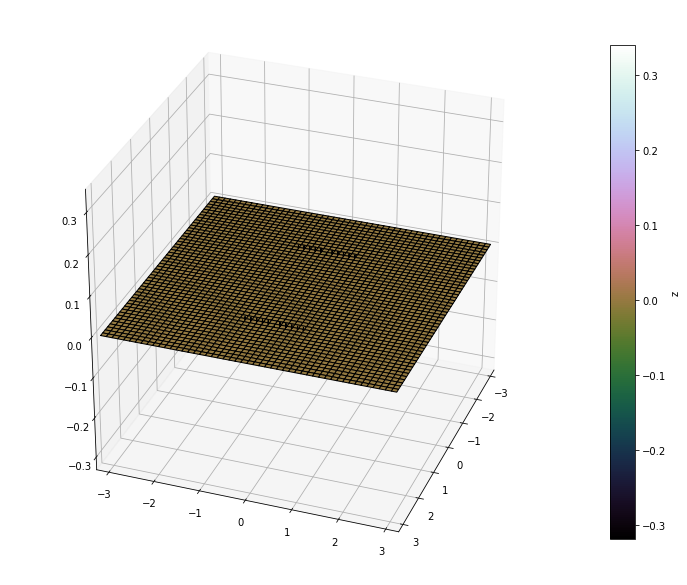

In [142]:
#### %%opts Surface ()
surface=hv.Surface(fermi_surface_atm_pb(evsmat,0,4)[0],bounds=(-np.pi,-np.pi,np.pi,np.pi))
surface.options(fig_size=350,colorbar=True,azimuth=20,cmap='cubehelix',linewidth=1,edgecolor='black',labelled=[])